In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.linear_model import LogisticRegression
import warnings # For handling error messages.
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Video_Games_Sales_Cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8,E
1,1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E
2,2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8,E
3,3,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E
4,4,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1373 non-null   int64  
 1   Rank          1373 non-null   int64  
 2   Name          1373 non-null   object 
 3   Platform      1373 non-null   object 
 4   Year          1373 non-null   float64
 5   Genre         1373 non-null   object 
 6   Publisher     1373 non-null   object 
 7   NA_ Sales     1373 non-null   float64
 8   EU_Sales      1373 non-null   float64
 9   JP_Sales      1373 non-null   float64
 10  Other_Sales   1373 non-null   float64
 11  Global_Sales  1373 non-null   float64
 12  Critic_Score  1373 non-null   float64
 13  User_Score    1373 non-null   object 
 14  Rating        1372 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 161.0+ KB


In [5]:
#need to clean the data 
#Remove the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
#Convert the Year column to integer
df['Year'] = df['Year'].astype(int)

df[df['User_Score']=='tbd']
df = df[df['User_Score'] != 'tbd']
#Convert the Rank column to an index
df.set_index('Rank', inplace=True)
#Create a new column called Total_Sales which is the sum of the sales in all regions
df['Total_Sales'] = df['NA_ Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df["User_Score"] = df["User_Score"].astype(float)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 1 to 2080
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1351 non-null   object 
 1   Platform      1351 non-null   object 
 2   Year          1351 non-null   int32  
 3   Genre         1351 non-null   object 
 4   Publisher     1351 non-null   object 
 5   NA_ Sales     1351 non-null   float64
 6   EU_Sales      1351 non-null   float64
 7   JP_Sales      1351 non-null   float64
 8   Other_Sales   1351 non-null   float64
 9   Global_Sales  1351 non-null   float64
 10  Critic_Score  1351 non-null   float64
 11  User_Score    1351 non-null   float64
 12  Rating        1350 non-null   object 
 13  Total_Sales   1351 non-null   float64
dtypes: float64(8), int32(1), object(5)
memory usage: 153.0+ KB


In [7]:
#Check out the appearance of data
df.head()

,Name,Platform,Year,Genre,Publisher,NA_ Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Rating,Total_Sales
Rank,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,8.0,E,82.74
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,8.3,E,35.83
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,8.0,E,33.00
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,8.5,E,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,6.6,E,29.01


In [9]:
print(df[['User_Score', 'Critic_Score']].isnull().sum())

User_Score      0
Critic_Score    0
dtype: int64


In [10]:
print(df.isnull().sum())

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_ Sales       0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
User_Score      0
Rating          1
Total_Sales     0
dtype: int64


In [14]:
#I will not be using Rating for this assignment. 

# extract the numeric features
numeric_features = ['Year', 'Global_Sales','Critic_Score', 'User_Score']

# extract the categorical feature
categorical_feature = ['Genre', 'Platform']

In [15]:
# perform one-hot encoding on the categorical feature
dummy_df = pd.get_dummies(df[categorical_feature], prefix=categorical_feature)

# concatenate the numeric and dummy features
X = pd.concat([df[numeric_features], dummy_df], axis=1)

In [16]:
# initialize the scaler
scaler = StandardScaler()

# fit and transform the numeric and dummy features
X = scaler.fit_transform(X)

In [17]:
# save the standardized data
standardized_df = pd.DataFrame(X, columns=numeric_features + list(dummy_df.columns))
standardized_df.to_csv('standardized_video_games_data.csv', index=False)

In [18]:
standardized_df.head

<bound method NDFrame.head of           Year  Global_Sales  Critic_Score  User_Score  Genre_Action  \
0    -0.441457     21.280205     -0.308438    0.328950     -0.565098   
1     0.042837      8.796565      0.234611    0.576717     -0.565098   
2     0.284985      8.046269      0.053595    0.328950     -0.565098   
3    -0.441457      7.250743      0.868169    0.741895     -0.565098   
4    -0.441457      6.987342     -1.937586   -0.827296     -0.565098   
...        ...           ...           ...         ...           ...   
1346 -1.410047     -0.467722     -0.670471    1.402606      1.769604   
1347 -0.683605     -0.467722     -3.204701   -0.827296     -0.565098   
1348  1.253574     -0.467722     -0.127422   -0.992474      1.769604   
1349  1.253574     -0.467722     -0.489455   -0.909885      1.769604   
1350  0.769279     -0.467722      0.868169    0.907073     -0.565098   

      Genre_Adventure  Genre_Fighting  Genre_Misc  Genre_Platform  \
0           -0.109476       -0.23726

In [19]:
df_concat = pd.concat([df, standardized_df], axis=1)

# print the concatenated data frame
print(df_concat.head())

                    Name Platform    Year     Genre Publisher  NA_ Sales  \
1             Wii Sports      Wii  2006.0    Sports  Nintendo      41.49   
3         Mario Kart Wii      Wii  2008.0    Racing  Nintendo      15.85   
4      Wii Sports Resort      Wii  2009.0    Sports  Nintendo      15.75   
7  New Super Mario Bros.       DS  2006.0  Platform  Nintendo      11.38   
8               Wii Play      Wii  2006.0      Misc  Nintendo      14.03   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  Platform_PS2  \
1     29.02      3.77         8.46         82.74  ...     -0.503236   
3     12.88      3.79         3.31         35.82  ...     -0.503236   
4     11.01      3.28         2.96         33.00  ...     -0.503236   
7      9.23      6.50         2.90         30.01  ...     -0.503236   
8      9.20      2.93         2.85         29.02  ...     -0.503236   

   Platform_PS3 Platform_PS4  Platform_PSP  Platform_PSV  Platform_Wii  \
1     -0.454148    -0.226632     -0.191932

In [23]:
standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                1351 non-null   float64
 1   Global_Sales        1351 non-null   float64
 2   Critic_Score        1351 non-null   float64
 3   User_Score          1351 non-null   float64
 4   Genre_Action        1351 non-null   float64
 5   Genre_Adventure     1351 non-null   float64
 6   Genre_Fighting      1351 non-null   float64
 7   Genre_Misc          1351 non-null   float64
 8   Genre_Platform      1351 non-null   float64
 9   Genre_Puzzle        1351 non-null   float64
 10  Genre_Racing        1351 non-null   float64
 11  Genre_Role-Playing  1351 non-null   float64
 12  Genre_Shooter       1351 non-null   float64
 13  Genre_Simulation    1351 non-null   float64
 14  Genre_Sports        1351 non-null   float64
 15  Genre_Strategy      1351 non-null   float64
 16  Platfo

In [44]:
standardized_df.describe()

,Year,Global_Sales,Critic_Score,User_Score,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
count,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,...,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03,1.351000e+03
mean,2.250688e-15,-4.012745e-16,-3.621579e-16,-1.033798e-15,4.002062e-17,-1.556860e-16,-7.080445e-16,-7.847987e-17,1.641092e-16,3.151521e-17,...,-2.319059e-16,1.557682e-16,-1.296561e-15,-1.030798e-15,-4.550600e-16,-2.870473e-16,2.441299e-16,5.318552e-16,-1.958915e-15,1.745047e-16
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,...,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-1.894341e+00,-4.677220e-01,-5.376898e+00,-4.708977e+00,-5.650982e-01,-1.094761e-01,-2.372635e-01,-2.842534e-01,-2.781231e-01,-1.286616e-01,...,-5.032363e-01,-4.541476e-01,-2.266316e-01,-1.919325e-01,-7.216878e-02,-3.207135e-01,-1.162040e-01,-4.482063e-01,-1.919325e-01,-1.746742e-01
25%,-9.257519e-01,-3.918943e-01,-4.894545e-01,-4.143509e-01,-5.650982e-01,-1.094761e-01,-2.372635e-01,-2.842534e-01,-2.781231e-01,-1.286616e-01,...,-5.032363e-01,-4.541476e-01,-2.266316e-01,-1.919325e-01,-7.216878e-02,-3.207135e-01,-1.162040e-01,-4.482063e-01,-1.919325e-01,-1.746742e-01
50%,4.283731e-02,-2.708360e-01,2.346112e-01,2.463609e-01,-5.650982e-01,-1.094761e-01,-2.372635e-01,-2.842534e-01,-2.781231e-01,-1.286616e-01,...,-5.032363e-01,-4.541476e-01,-2.266316e-01,-1.919325e-01,-7.216878e-02,-3.207135e-01,-1.162040e-01,-4.482063e-01,-1.919325e-01,-1.746742e-01
75%,7.692793e-01,3.114464e-02,6.871523e-01,7.418947e-01,-5.650982e-01,-1.094761e-01,-2.372635e-01,-2.842534e-01,-2.781231e-01,-1.286616e-01,...,-5.032363e-01,-4.541476e-01,-2.266316e-01,-1.919325e-01,-7.216878e-02,-3.207135e-01,-1.162040e-01,-4.482063e-01,-1.919325e-01,-1.746742e-01
max,1.980016e+00,2.128020e+01,1.682743e+00,1.567784e+00,1.769604e+00,9.134413e+00,4.214723e+00,3.517988e+00,3.595530e+00,7.772329e+00,...,1.987138e+00,2.201928e+00,4.412448e+00,5.210166e+00,1.385641e+01,3.118048e+00,8.605554e+00,2.231115e+00,5.210166e+00,5.724945e+00


In [35]:
from sklearn.model_selection import train_test_split

X = standardized_df[['Year','Critic_Score', 'User_Score']] # input features
y = standardized_df['Global_Sales'] # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape

((1080, 3), (271, 3))

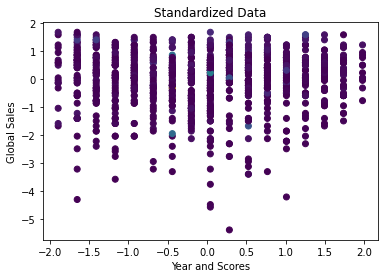

In [39]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train)
plt.xlabel('Year and Scores')
plt.ylabel('Global Sales')
plt.title('Standardized Data')
plt.show()

In [40]:

X = df[['Year','Critic_Score', 'User_Score']] # input features
y = df['Global_Sales'] # target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape, X_test.shape

((1080, 3), (271, 3))

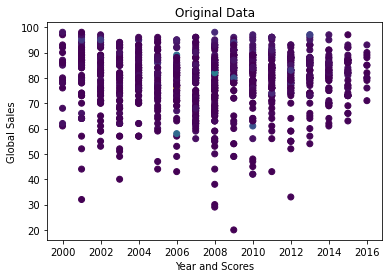

In [43]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train)
plt.xlabel('Year and Scores')
plt.ylabel('Global Sales')
plt.title('Original Data')
plt.show()